In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [20]:
X,y = load_iris(return_X_y=True)
print(X[:100])
print(y[:100])
X_train,X_test,y_train,y_test = train_test_split(X[:100],y[:100],test_size=0.3)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [21]:
print(X_train.shape)
print(X_test.shape)

(70, 4)
(30, 4)


In [22]:
theta = np.random.rand(1,4)
bias = 0
lr = 1e-4
epochs = 3000



epoch:0,loss1.3755888868430135,acc:0.5285714285714286
epoch:100,loss0.48621257946155844,acc:0.5285714285714286
epoch:200,loss0.3466605108604632,acc:1.0
epoch:300,loss0.319220112623886,acc:1.0
epoch:400,loss0.29893384556915964,acc:1.0
epoch:500,loss0.28099134042341195,acc:1.0
epoch:600,loss0.26492698425718236,acc:1.0
epoch:700,loss0.2504768447063827,acc:1.0
epoch:800,loss0.23742480201513158,acc:1.0
epoch:900,loss0.2255894424391025,acc:1.0
epoch:1000,loss0.2148176562776109,acc:1.0
epoch:1100,loss0.20497964230510923,acc:1.0
epoch:1200,loss0.19596487152679035,acc:1.0
epoch:1300,loss0.18767881253551524,acc:1.0
epoch:1400,loss0.18004026742946708,acc:1.0
epoch:1500,loss0.17297919768703368,acc:1.0
epoch:1600,loss0.16643494371484993,acc:1.0
epoch:1700,loss0.16035476134889237,acc:1.0
epoch:1800,loss0.15469261421594177,acc:1.0
epoch:1900,loss0.14940817327711509,acc:1.0
epoch:2000,loss0.14446598470637048,acc:1.0
epoch:2100,loss0.13983477503280148,acc:1.0
epoch:2200,loss0.1354868686268298,acc:1.0
e

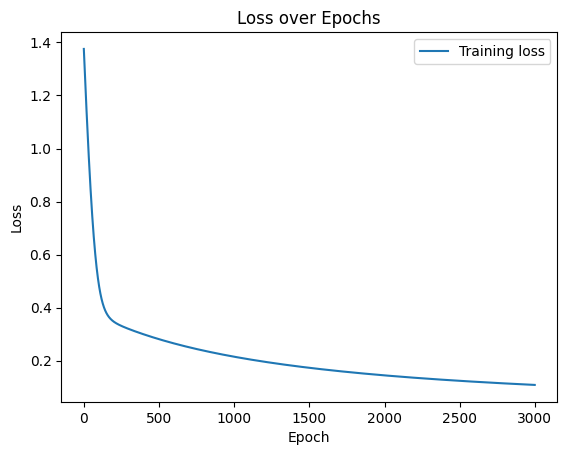

In [23]:
def forward(x,theta,bias):
    # 前向传播
    z = np.dot(theta,x.T)+bias
    # 激活函数
    y_hat = 1/(1+np.exp(-z))
    return y_hat
# 损失函数
def loss(y,y_hat):
    e = 1e-8
    return -np.mean(y*np.log(y_hat+e)+(1-y)*np.log(1-y_hat+e))

# 计算梯度
def calc_gradient(x,y,y_hat):
    m = x.shape[-1]
    delta_theta = np.dot((y_hat-y),x)/m
    delta_bias = np.mean(y_hat-y)
    return delta_theta, delta_bias

# 保存训练好的参数
def save_params(theta, bias, filename):
    np.savez(filename, theta=theta, bias=bias)

loss_history = []

# 训练模型
for i in range(epochs):
    # 前向传播
    y_hat = forward(X_train,theta,bias)
    # 计算损失
    loss_val = loss(y_train,y_hat)
    # 记录损失值
    loss_history.append(loss_val)
    # 计算梯度
    delta_theta,delta_bias = calc_gradient(X_train,y_train,y_hat)
    # 更新参数
    theta = theta - lr* delta_theta
    bias = bias -lr*delta_bias
    # 打印损失和准确率
    if i % 100 == 0:
        acc = np.mean(np.round(y_hat)==y_train)
        print(f"epoch:{i},loss{np.mean(loss_val)},acc:{acc}")

# 训练结束后，保存参数       
save_params(theta, bias, 'trained_params.npz')


# 加载保存的参数
def load_params(filename):
    params = np.load(filename)
    theta = params['theta']
    bias = params['bias']
    return theta, bias

# 绘制损失函数变化图
plt.plot(loss_history,label="Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()

        

In [31]:
# 加载训练好的参数
theta, bias = load_params('trained_params.npz')

# 继续使用或进行推理
y_hat = forward(X_test, theta, bias)
print(y_hat)

[[0.15422591 0.1100232  0.11152939 0.89282031 0.12928688 0.1371538
  0.09675775 0.08432833 0.0665024  0.08547061 0.09004454 0.95954835
  0.91791243 0.90054676 0.86493764 0.94491891 0.11764767 0.83757717
  0.97018091 0.07008289 0.08053904 0.06718507 0.14119723 0.94677525
  0.11075598 0.97108135 0.08563272 0.91579513 0.93858912 0.92645853]]


In [32]:
idx = np.random.randint(len(X_test))
x = X_test[idx]
y = y_test[idx]

predict = np.round(forward(x,theta,bias))
print(f"y:{y},predict{predict}")

y:0,predict[0.]
